In [1]:
# example of gathering, reading, and plotting data
# developed by FBB for PUI in 2018
# uses NYC data portal NYC OPEN DATA https://data.cityofnewyork.us/

In [13]:
#select 2 columns only for plotting
df2 = df[['YEAR', 'Adult Families in Shelter']]

In [2]:
from __future__ import print_function #for compatibility beteen python2 and python3

# all other needed modules will be imported as they are needed. 
# I will leave them in the cell where they become relevant BUT  
# PEP8 standards require to move them at the top cell, 
# so you must move your imports in this cell for the homework

In [102]:
import numpy as np

In [ ]:
#worked with mei

# Find data on the portal

 Using NYC DOHMH data on new diagnoses of HIV and AIDS in NYC
obtained with the following steps from the website

https://opendata.cityofnewyork.us/ -> Data
https://opendata.cityofnewyork.us/data/ -> Department of Health and Mental Hygiene (DOHMH)
https://data.cityofnewyork.us/browse?Dataset-Information_Agency=Department+of+Health+and+Mental+Hygiene+%28DOHMH%29 ->  HIV/AIDS Diagnoses by Neighborhood, Sex, and Race/Ethnicity

https://data.cityofnewyork.us/Health/HIV-AIDS-Diagnoses-by-Neighborhood-Sex-and-Race-Et/ykvb-493p ->  View Data

https://data.cityofnewyork.us/Health/HIV-AIDS-Diagnoses-by-Neighborhood-Sex-and-Race-Et/ykvb-493p -> Export

this gives me various links. I copy and paste below the CSV link

https://data.cityofnewyork.us/api/views/ykvb-493p/rows.csv?accessType=DOWNLOAD

# solution 1: download from the portal 


In [91]:
!curl https://data.cityofnewyork.us/api/views/ykvb-493p/rows.csv?accessType=DOWNLOAD > HIVAIDsdata.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  164k    0  164k    0     0   602k      0 --:--:-- --:--:-- --:--:--  602k


In [92]:
# ove the downloaded data to PUI data
import os
print("PUIdata", os.getenv("puidata"))

PUIdata None


In [93]:
#create the env variable if missing
#added PUI2018 to path 
os.environ["PUIDATA"] = "%s/PUI2018/PUIdata"%os.getenv("HOME")

print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/sjf374/PUI2018/PUIdata


In [94]:
# move the data
!mv HIVAIDsdata.csv $PUIDATA

In [95]:
#test if the data is there
!ls $PUIDATA

HIVAIDsdata.csv


## read in the data with pandas

In [96]:
#read in the data with pandas
import pandas as pd
df = pd.read_csv("%s/HIVAIDsdata.csv"%os.getenv("PUIDATA"))

In [97]:
#print the fist 8 lines out
df.head(8)

,YEAR,Neighborhood (U.H.F),SEX,RACE/ETHNICITY,TOTAL NUMBER OF HIV DIAGNOSES,"HIV DIAGNOSES PER 100,000 POPULATION",TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES,PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES,TOTAL NUMBER OF AIDS DIAGNOSES,"AIDS DIAGNOSES PER 100,000 POPULATION"
0,2010,Greenpoint,Male,Black,6,330.4,0,0,5,275.3
1,2011,Stapleton - St. George,Female,Native American,0,0,0,0,0,0
2,2010,Southeast Queens,Male,All,23,25.4,5,21.7,14,15.4
3,2012,Upper Westside,Female,Unknown,0,0,0,0,0,0
4,2013,Willowbrook,Male,Unknown,0,0,0,0,0,0
5,2013,East Flatbush - Flatbush,Male,Black,54,56.5,8,14.8,33,34.5
6,2013,East Flatbush - Flatbush,Female,Native American,0,0,0,0,0,0
7,2013,Southwest Queens,Female,Unknown,0,0,0,0,0,0


In [98]:
#print the last 3 lines out
df.tail(3)

,YEAR,Neighborhood (U.H.F),SEX,RACE/ETHNICITY,TOTAL NUMBER OF HIV DIAGNOSES,"HIV DIAGNOSES PER 100,000 POPULATION",TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES,PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES,TOTAL NUMBER OF AIDS DIAGNOSES,"AIDS DIAGNOSES PER 100,000 POPULATION"
2925,2010,Bedford Stuyvesant - Crown Heights,Male,Native American,0,0,0,0,0,0
2926,2011,Long Island City - Astoria,Male,Black,6,97.6,1,16.7,3,48.8
2927,2011,Bensonhurst - Bay Ridge,Female,Hispanic,0,0,0,0,0,0


In [99]:
#look at the columns available, those are the variables
df.columns

Index(['YEAR', 'Neighborhood (U.H.F)', 'SEX', 'RACE/ETHNICITY',
       'TOTAL NUMBER OF HIV DIAGNOSES', 'HIV DIAGNOSES PER 100,000 POPULATION',
       'TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES',
       'PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES',
       'TOTAL NUMBER OF AIDS DIAGNOSES',
       'AIDS DIAGNOSES PER 100,000 POPULATION'],
      dtype='object')

In [100]:
#count how many rows, those are the data points
df.size

29280

In [105]:
df['TOTAL NUMBER OF AIDS DIAGNOSES'].replace('*', np.nan, inplace=True)

In [106]:
df['TOTAL NUMBER OF AIDS DIAGNOSES'].unique()

array(['5', '0', '14', '33', '12', nan, '1', '4', '11', '2', '55', '13',
       '46', '20', '3', '15', '59', '35', '81', '68', '40', '24', '31',
       '9', '28', '27', '10', '30', '56', '16', '7', '6', '17', '71', '75',
       '64', '50', '21', '19', '8', '1784', '43', '60', '18', '36', '25',
       '99', '42', '102', '22', '38', '144', '51', '26', '45', '37', '69',
       '67', '96', '23', '73', '48', '114', '58', '49', '32', '108', '100',
       '78', '2036', '129', '61', '97', '57', '155', '70', '62', '39',
       '63', '82', '93', '176', '79', '84', '34', '47', '41', '222', '29',
       '122', '66', '54', '128', '89', '74', '72', '120', '87', '124',
       '106', '2292', '53', '77', '203', '180', '118', '44', '52', '132',
       '101', '229', '201', '159', '2611', '110', '90', '83', '91', '88',
       '98', '65', '86', '221', '104', '85', '168', '193'], dtype=object)

In [127]:
df['TOTAL NUMBER OF HIV DIAGNOSES'].unique()

array(['6', '0', '54', '7', '5', '1', '14', '17', '2', '4', '34', '11',
       '24', '38', '9', '19', '13', '25', '28', '8', '99', '3', '16', '18',
       '15', '21', '74', '113', '55', '62', '20', '36', '75', '23', '87',
       '10', '12', '27', '85', '26', '66', '33', '44', '*', '29', '45',
       '22', '35', '60', '40', '58', '95', '32', '31', '90', '98', '79',
       '80', '92', '41', '56', '94', '37', '57', '88', '39', '112', '43',
       '102', '42', '30', '48', '96', '65', '52', '63', '131', '109', '84',
       '50', '46', '81', '101'], dtype=object)

In [128]:
df['TOTAL NUMBER OF HIV DIAGNOSES'].replace('*', np.nan, inplace=True)

In [129]:
df['TOTAL NUMBER OF HIV DIAGNOSES'].unique()

array(['6', '0', '54', '7', '5', '1', '14', '17', '2', '4', '34', '11',
       '24', '38', '9', '19', '13', '25', '28', '8', '99', '3', '16', '18',
       '15', '21', '74', '113', '55', '62', '20', '36', '75', '23', '87',
       '10', '12', '27', '85', '26', '66', '33', '44', nan, '29', '45',
       '22', '35', '60', '40', '58', '95', '32', '31', '90', '98', '79',
       '80', '92', '41', '56', '94', '37', '57', '88', '39', '112', '43',
       '102', '42', '30', '48', '96', '65', '52', '63', '131', '109', '84',
       '50', '46', '81', '101'], dtype=object)

In [111]:
df = df[df['SEX'] != 'All'][df['RACE/ETHNICITY'] != 'All']

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [115]:
df.head()

,YEAR,Neighborhood (U.H.F),SEX,RACE/ETHNICITY,TOTAL NUMBER OF HIV DIAGNOSES,"HIV DIAGNOSES PER 100,000 POPULATION",TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES,PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES,TOTAL NUMBER OF AIDS DIAGNOSES,"AIDS DIAGNOSES PER 100,000 POPULATION"
0,2010,Greenpoint,Male,Black,6,330.4,0,0,5,275.3
1,2011,Stapleton - St. George,Female,Native American,0,0,0,0,0,0
3,2012,Upper Westside,Female,Unknown,0,0,0,0,0,0
4,2013,Willowbrook,Male,Unknown,0,0,0,0,0,0
5,2013,East Flatbush - Flatbush,Male,Black,54,56.5,8,14.8,33,34.5


In [75]:
df['TOTAL NUMBER OF AIDS DIAGNOSES'].unique()

array(['5', '0', '14', '33', '12', '*', '1', '4', '11', '2', '55', '13',
       '46', '20', '3', '15', '59', '35', '81', '68', '40', '24', '31',
       '9', '28', '27', '10', '30', '56', '16', '7', '6', '17', '71', '75',
       '64', '50', '21', '19', '8', '1784', '43', '60', '18', '36', '25',
       '99', '42', '102', '22', '38', '144', '51', '26', '45', '37', '69',
       '67', '96', '23', '73', '48', '114', '58', '49', '32', '108', '100',
       '78', '2036', '129', '61', '97', '57', '155', '70', '62', '39',
       '63', '82', '93', '176', '79', '84', '34', '47', '41', '222', '29',
       '122', '66', '54', '128', '89', '74', '72', '120', '87', '124',
       '106', '2292', '53', '77', '203', '180', '118', '44', '52', '132',
       '101', '229', '201', '159', '2611', '110', '90', '83', '91', '88',
       '98', '65', '86', '221', '104', '85', '168', '193'], dtype=object)

In [117]:
df.dtypes

YEAR                                                                    int64
Neighborhood (U.H.F)                                                   object
SEX                                                                    object
RACE/ETHNICITY                                                         object
TOTAL NUMBER OF HIV DIAGNOSES                                          object
HIV DIAGNOSES PER 100,000 POPULATION                                   object
TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES                          object
PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES    object
TOTAL NUMBER OF AIDS DIAGNOSES                                         object
AIDS DIAGNOSES PER 100,000 POPULATION                                  object
dtype: object

In [133]:
df['TOTAL NUMBER OF AIDS DIAGNOSES'] = df['TOTAL NUMBER OF AIDS DIAGNOSES'].apply(pd.to_numeric, errors='coerce')
df['TOTAL NUMBER OF HIV DIAGNOSES'] = df['TOTAL NUMBER OF HIV DIAGNOSES'].apply(pd.to_numeric, errors='coerce')


In [134]:
#select 2 columns only for plotting
df2 = df[['TOTAL NUMBER OF HIV DIAGNOSES', 'TOTAL NUMBER OF AIDS DIAGNOSES']]

In [135]:
df2.head()

,TOTAL NUMBER OF HIV DIAGNOSES,TOTAL NUMBER OF AIDS DIAGNOSES
0,6.0,5.0
1,0.0,0.0
3,0.0,0.0
4,0.0,0.0
5,54.0,33.0


In [136]:
df2.dtypes

TOTAL NUMBER OF HIV DIAGNOSES     float64
TOTAL NUMBER OF AIDS DIAGNOSES    float64
dtype: object

## plot the data

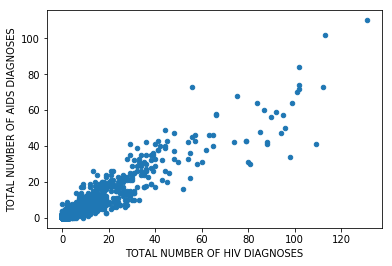

In [137]:
df2.plot(kind='scatter', x='TOTAL NUMBER OF HIV DIAGNOSES', y='TOTAL NUMBER OF AIDS DIAGNOSES')

In [16]:
# wont show anything if i do not use the magic command to show plots in the notebook 
#(or use pl.show to pop up a window, but for the homework plots have to be embedded)

In [61]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


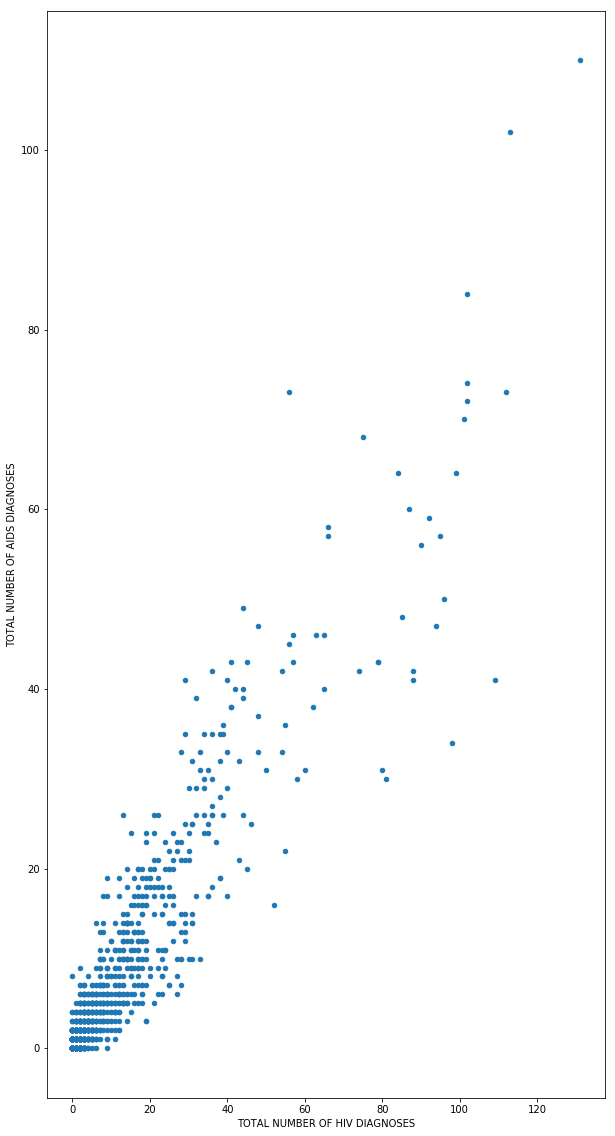

In [140]:
df2.plot(kind='scatter', x='TOTAL NUMBER OF HIV DIAGNOSES', y='TOTAL NUMBER OF AIDS DIAGNOSES', figsize=(10,20))

# every plot needs a caption that explains to the reader 
# 1) WHAT what the reader is loooking at and 
# 2) WHY why the reader is looking at it here in the analysis 
#      (in this case there is no why cause this plot is not part of an analysis)
# 3) TAKE HOME what is the take home point for the plot in the analysis 
#      (also there is no take home point here cause we are not doind an analysis but you can point out interesting features)

Figure 1: #### TODO

# solution 2: Use API and download a json file

from the dataset export link now go to -> SODA API and the the endpoint

In [19]:
url = "https://data.cityofnewyork.us/resource/wece-v9d7.json"

In [20]:
#use the appropriatepandas function to read in the json file
df = pd.read_json(url)

In [21]:
# print it out
df.head(3)

,adult_families_in_shelter,adults_in_families_with_children_in_shelter,children_in_families_with_children_in_shelter,date_of_census,families_with_children_in_shelter,individuals_in_adult_families_in_shelter,single_adult_men_in_shelter,single_adult_women_in_shelter,total_adults_in_shelter,total_children_in_shelter,total_individuals_in_families_with_children_in_shelter_,total_individuals_in_shelter,total_single_adults_in_shelter
0,1796,14607,21314,2013-08-21T00:00:00.000,10261,3811,7231,2710,28359,21314,35921,49673,9941
1,1803,14622,21324,2013-08-22T00:00:00.000,10274,3827,7201,2716,28366,21324,35946,49690,9917
2,1802,14611,21291,2013-08-23T00:00:00.000,10266,3826,7149,2671,28257,21291,35902,49548,9820


In [22]:
#now select a date and 2 variables
dhs_3c = df[['date_of_census', 'total_children_in_shelter', 'adult_families_in_shelter']]

for consistency with the data above, I will change the names of the columns (variables) to be the same as before. This way the plots will come out with the same labels and legends

In [23]:
dhs_3c.rename(columns = {'date_of_census':'Date of Census', 
               'total_children_in_shelter':'Total Children in Shelter', 
               'adult_families_in_shelter': 'Adult Families in Shelter'}, inplace=True)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


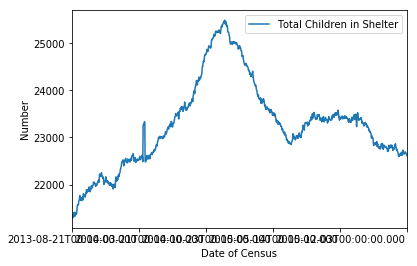

In [24]:
#as a default this plot wont have a y label, but all plots must have axis labels!
ax = dhs_3c.plot(x='Date of Census', y='Total Children in Shelter');
ax.set_ylabel("Number");

i do not like the formatting of those dates so I will drom the timestamp overwriting the original column. 
for more info on baisc timestamp manipulation 
( no capation cause I am remaking this figure)


In [25]:
dhs_3c["Date of Census"] = dhs_3c["Date of Census"].apply(lambda x: pd.Timestamp(x))

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


now that I am using timestamps (instead of strings as the data got read in form the json file) Pandas know to rotate the labels appropriately so I can drop rot=90

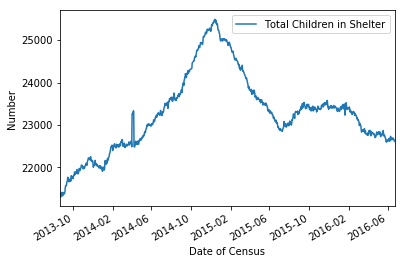

In [26]:
ax = dhs_3c.plot(x='Date of Census', y='Total Children in Shelter')
ax.set_ylabel("Number");

Figure 2: number of adult families in NYC shelters as a function of time between 8/21/2013 and 9/16/2018. The number peaks in early 2015. there is no single trend, but seasonal trends can be spotted

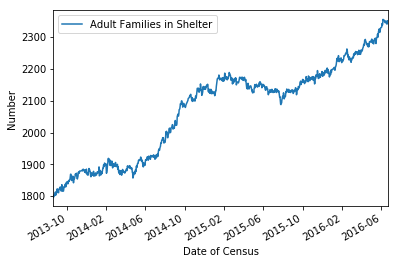

In [27]:
#plot the other columns
ax = dhs_3c.plot(x='Date of Census', y='Adult Families in Shelter')
ax.set_ylabel("Number");

Figure 3: number of adult families NYC shelters against total number of children in shelters as reported by the Department of Homeless Services between 8/21/2013 and 9/16/2018. Unlike fo the number of adult families, there is a steady increasing trend in the children shelter population which grows from 1800 by about 30% 